In [ ]:
##https://archetypalecology.wordpress.com/2018/02/21/permutational-multivariate-analysis-of-variance-permanova-in-r-preliminary/

In [1]:
library(vegan)
data(dune)
data(dune.env)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



In [2]:
dune

,Achimill,Agrostol,Airaprae,Alopgeni,Anthodor,Bellpere,Bromhord,Chenalbu,Cirsarve,Comapalu,⋯,Ranuflam,Rumeacet,Sagiproc,Salirepe,Scorautu,Trifprat,Trifrepe,Vicilath,Bracruta,Callcusp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,3,0,0,2,0,3,4,0,0,0,⋯,0,0,0,0,5,0,5,0,0,0
3,0,4,0,7,0,2,0,0,0,0,⋯,0,0,0,0,2,0,2,0,2,0
4,0,8,0,2,0,2,3,0,2,0,⋯,0,0,5,0,2,0,1,0,2,0
5,2,0,0,0,4,2,2,0,0,0,⋯,0,5,0,0,3,2,2,0,2,0
6,2,0,0,0,3,0,0,0,0,0,⋯,0,6,0,0,3,5,5,0,6,0
7,2,0,0,0,2,0,2,0,0,0,⋯,0,3,0,0,3,2,2,0,2,0
8,0,4,0,5,0,0,0,0,0,0,⋯,2,0,2,0,3,0,2,0,2,0
9,0,3,0,3,0,0,0,0,0,0,⋯,0,2,2,0,2,0,3,0,2,0


In [3]:
dune.dist <- vegdist(dune, method="bray")
# default test by terms
dune.div <- adonis2(dune ~ Management*A1, data = dune.env, permutations = 999, method="bray")
dune.div

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Management,3,1.4685918,0.3416107,3.262876,0.002
A1,1,0.4408892,0.1025557,2.938666,0.019
Management:A1,3,0.5891763,0.1370489,1.309015,0.198
Residual,12,1.8003646,0.4187847,NA,NA
Total,19,4.2990219,1.0000000,NA,NA


In [4]:
# overall tests
adonis2(dune ~ Management*A1, data = dune.env, permutations = 999, method="bray", by = NULL)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,7,2.498657,0.5812153,2.379192,0.003
Residual,12,1.800365,0.4187847,NA,NA
Total,19,4.299022,1.0000000,NA,NA


The different management styles (Biological farming, Hobby farming etc) indeed have a significant effect on species composition (p < 0.05).

Analysis of multivariate homogeneity of group dispersions (variances).
Used as a measure of multivariate beta diversity. Bedadisper is a multivariate analogue of Levene’s test for homogeneity of variances. 

In [5]:
dispersion <- betadisper(dune.dist, group=dune.env$Management)
permutest(dispersion)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups     3 0.13831 0.046104 1.9506    999  0.139
Residuals 16 0.37816 0.023635                     

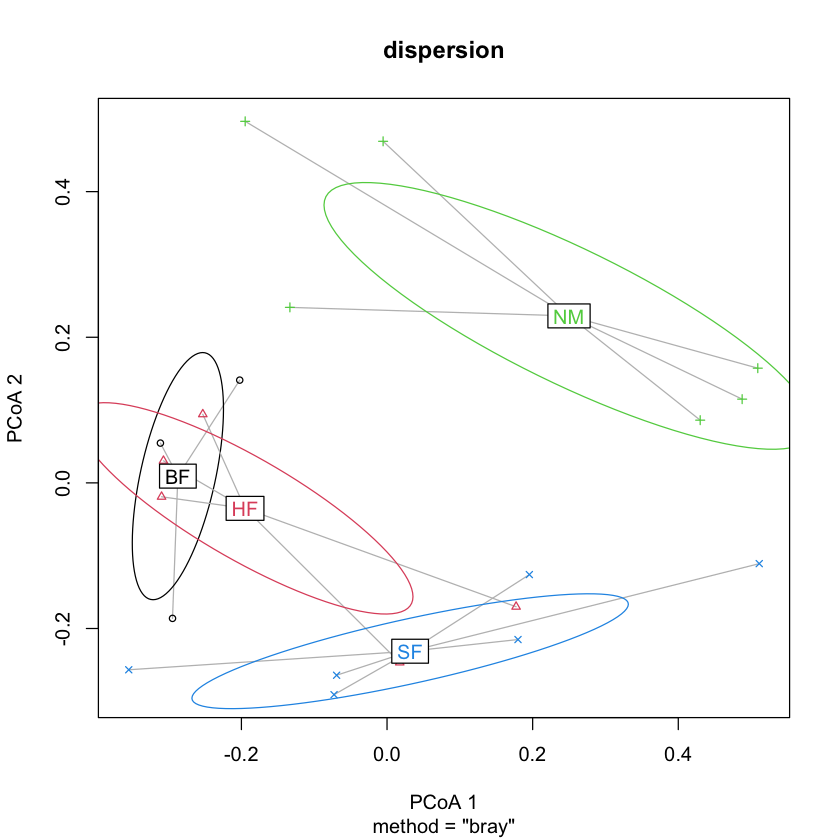

In [6]:
plot(dispersion, hull=FALSE, ellipse=TRUE) ##sd ellipse